In [1]:
import torch
import time

In [2]:
model = torch.load('infersent.allnli.pickle', map_location='cpu')

/home/cds/anaconda3/envs/py27/lib/python2.7/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'models.BLSTMEncoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/cds/anaconda3/envs/py27/lib/python2.7/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [3]:
model.set_glove_path('../data/glove.840B.300d.txt')

In [4]:
start = time.time()
model.build_vocab_k_words(K=100000)
print time.time() - start

Vocab size : 100000
27.5043690205


In [5]:
import json
import sys
sys.path.insert(1, '../../changing-views/analysis/')

In [6]:
with open('../../changing-views/data/data.json', 'r') as f:
    data = json.load(f)

In [7]:
from word_embeddings import GloVe
from tfidf_query import find_keywords, topic_search

In [8]:
data, dt_matrix, vocab = find_keywords(data, n=10)
glove = GloVe('../../changing-views/data/glove.6B.50d.txt')

../../changing-views/data/glove.6B.50d.txt
Loading word embeddings...


In [9]:
query = 'guns'
result = topic_search(query, data, glove, dt_matrix, vocab)
titles = [r['title'] for r in result]
encoded_titles = model.encode(titles)

models.py:206: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  sentences[stidx:stidx + bsize]), volatile=True)


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [11]:
embeds = normalize(PCA(n_components=2).fit_transform(encoded_titles))

In [12]:
import matplotlib.pyplot as plt

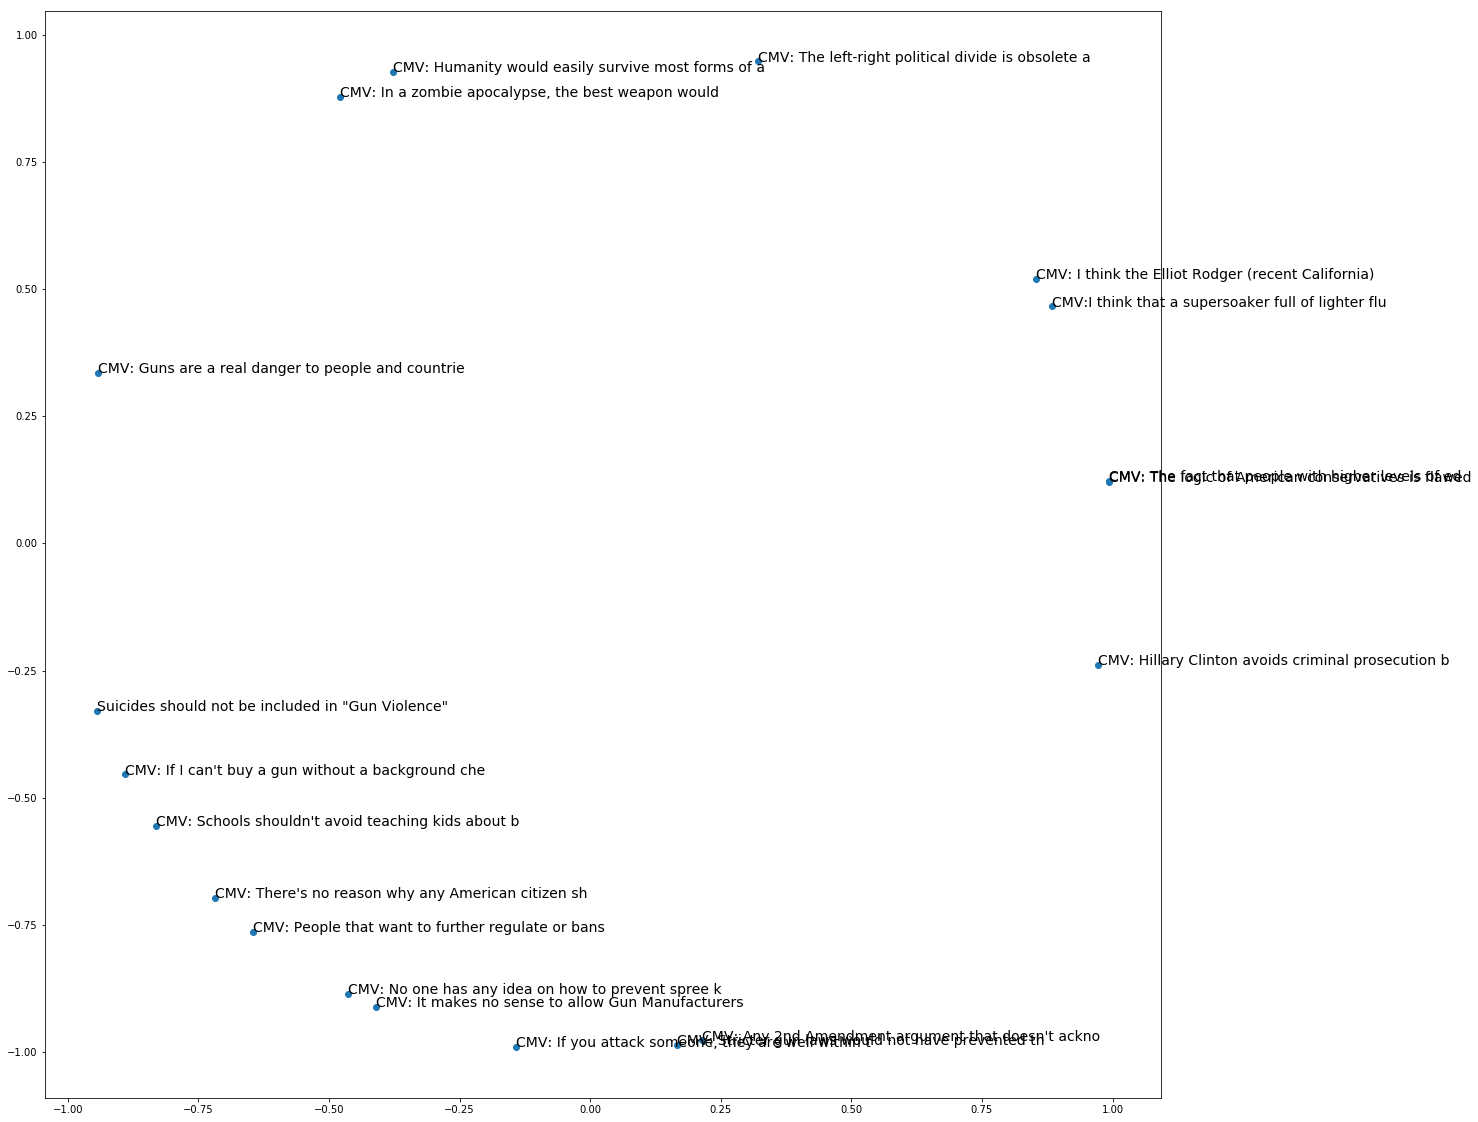

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(embeds[:, 0], embeds[:, 1])
for i, title in enumerate(titles):
    ax.annotate(title[:50], (embeds[i, 0], embeds[i, 1]), fontsize=14)
    
plt.show()